<a href="https://colab.research.google.com/github/Sikandar-Tariq/Gradient_descent/blob/main/Multi_regression_improved.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [301]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
my_array = np.array([
    [1, 2, 12],
    [2, 1, 13],
    [3, 4, 22],
    [4, 5, 27],
    [5, 2, 24],
    [6, 3, 29],
    [7, 5, 36],
    [8, 6, 41],
    [9, 7, 46],
    [10, 8, 51],
], dtype=float)
m,n=my_array.shape

X = my_array[:,0:n-1]
Y = my_array[:m,-1]
my_array


array([[ 1.,  2., 12.],
       [ 2.,  1., 13.],
       [ 3.,  4., 22.],
       [ 4.,  5., 27.],
       [ 5.,  2., 24.],
       [ 6.,  3., 29.],
       [ 7.,  5., 36.],
       [ 8.,  6., 41.],
       [ 9.,  7., 46.],
       [10.,  8., 51.]])

In [302]:
def params():
  W = np.ones(n-1)
  b = 0
  return W, b

def forwardprop(W,b,X):
  Z = X.dot(W) + b
  return Z

def backwardprop(Z,X,Y,W):
  dZ = Z-Y
  dW = 1/m * dZ.dot(X)
  db = 1/m * np.sum(dZ)
  return dW, db

def updateparams(W,b,dW,db,alpha):
  W = W - alpha * dW
  b = b - alpha * db
  return W, b

def compute_loss(Z, Y):
    m = len(Y)
    loss = (1/(2*m)) * np.sum((Z - Y)**2)
    return loss

def gradient_descent(X,Y,learningrate,steps):
  W, b = params()
  loss_history = []
  for i in range(steps):
    Z = forwardprop(W,b,X)
    dW, db = backwardprop(Z,X,Y,W)
    W, b = updateparams(W,b,dW,db,learningrate)
    loss = compute_loss(Z, Y)
    loss_history.append(loss)
  return W,b,loss_history

def make_prediction(X,W,b):
  Z = forwardprop(W,b,X)
  return Z


In [303]:
W,b,loss_history = gradient_descent(X,Y,0.01,4)
print(W,b)

[3.11842723 2.62558235] 0.343718312637


In [304]:
test = np.array([3,4])
print(make_prediction(test,W,b))

20.201329402037


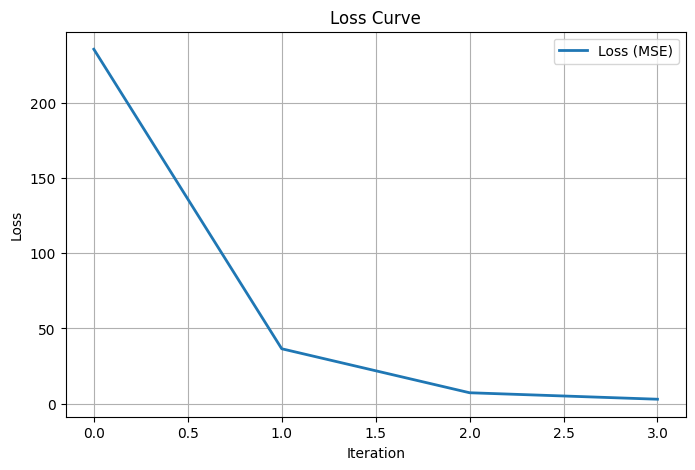

In [305]:
plt.figure(figsize=(8, 5))
plt.plot(loss_history, label="Loss (MSE)", linewidth=2)
plt.title("Loss Curve")
plt.xlabel("Iteration")
plt.ylabel("Loss")
plt.grid(True)
plt.legend()
plt.show()